In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [3]:
# 2) b)
def f1(t,x):
    return x[1]
def f2(t,x): 
    return np.cos(t)-5*x[1]-6*x[0]

In [4]:
# hardcoded runge kutta for system of two equations
def rungeKutta(f, a, b, n, alpha):
    h = (b-a)/n
    t = a
    omega1 = [alpha[0]]
    omega2 = [alpha[1]]
    for i in range(n):
        k11 = h*f[0](t,[omega1[i],omega2[i]])
        k12 = h*f[1](t,[omega1[i],omega2[i]])
        k21 = h*f[0](t+h/3,[omega1[i]+k11/3,omega2[i]+k12/3])
        k22 = h*f[1](t+h/3,[omega1[i]+k11/3,omega2[i]+k12/3])
        k31 = h*f[0](t+2*h/3,[omega1[i]-k11/3+k21,omega2[i]-k12/3+k22])
        k32 = h*f[1](t+2*h/3,[omega1[i]-k11/3+k21,omega2[i]-k12/3+k22])
        k41 = h*f[0](t+h,[omega1[i]+k11-k21+k31,omega2[i]+k12-k22+k32])
        k42 = h*f[1](t+h,[omega1[i]+k11-k21+k31,omega2[i]+k12-k22+k32])
        omega1.append(omega1[i]+1/8*(k11+3*k21+3*k31+k41))
        omega2.append(omega2[i]+1/8*(k12+3*k22+3*k32+k42))
        t += h
    return [omega1,omega2]

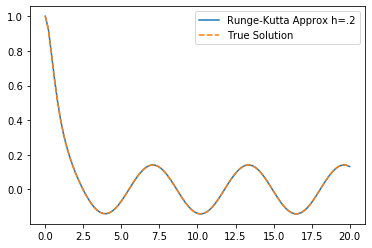

In [5]:
sol = rungeKutta([f1,f2],0,20,100,[1,0])[0]
trueSol = lambda t: -17/10*np.exp(-3*t)+13/5*np.exp(-2*t)+.1*(np.cos(t)+np.sin(t))

tvals = np.linspace(0,20,len(sol))
plt.plot(tvals,sol,label="Runge-Kutta Approx h=.2")
plt.plot(tvals,trueSol(tvals),linestyle="--",label="True Solution")
plt.legend()

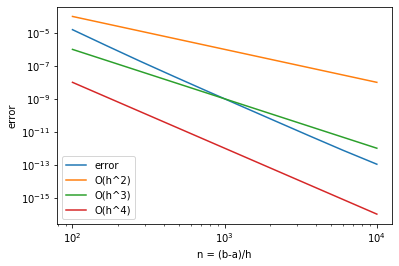

In [7]:
# 2) c)
nvals = np.logspace(2,4,10)
err = []
for i in range(len(nvals)):
    sol = rungeKutta([f1,f2],0,20,int(nvals[i]),[1,0])[0]
    err.append(abs(sol[len(sol)-1]-trueSol(20)))
plt.loglog(nvals,err,label="error")
plt.loglog(nvals,1/nvals**2,label="O(h^2)")
plt.loglog(nvals,1/nvals**3,label="O(h^3)")
plt.loglog(nvals,1/nvals**4,label="O(h^4)")
plt.xlabel("n = (b-a)/h"); plt.ylabel("error");
plt.legend()